In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns


In [58]:
df=pd.read_csv('pet_adoption_data.csv')

In [59]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,103,Black,Large,16,1,0,43,335,0,0
1,501,Rabbit,Labrador,8,Black,Medium,13,0,0,50,93,0,1
2,502,Dog,Parakeet,153,Gray,Small,10,0,0,3,79,0,0
3,503,Bird,Golden Retriever,91,Gray,Medium,21,0,0,59,37,1,0
4,504,Bird,Golden Retriever,174,Gray,Medium,7,1,0,28,407,0,1


In [60]:
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PetID               2007 non-null   int64 
 1   PetType             2007 non-null   object
 2   Breed               2007 non-null   object
 3   AgeMonths           2007 non-null   int64 
 4   Color               2007 non-null   object
 5   Size                2007 non-null   object
 6   WeightKg            2007 non-null   int64 
 7   Vaccinated          2007 non-null   int64 
 8   HealthCondition     2007 non-null   int64 
 9   TimeInShelterDays   2007 non-null   int64 
 10  AdoptionFee         2007 non-null   int64 
 11  PreviousOwner       2007 non-null   int64 
 12  AdoptionLikelihood  2007 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 204.0+ KB


In [62]:
df.isnull()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,False,False,False,False,False,False,False,False,False,False,False,False,False
2003,False,False,False,False,False,False,False,False,False,False,False,False,False
2004,False,False,False,False,False,False,False,False,False,False,False,False,False
2005,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
print(df.duplicated().sum())

0


In [64]:
df.shape

(2007, 13)

In [65]:
df.query('Vaccinated==1').shape

(1418, 13)

In [66]:
vaccinated_pets=df.groupby('PetType')['Vaccinated'].sum()
most_vaccinated=vaccinated_pets.sort_values(ascending=False)
print(most_vaccinated)


PetType
Dog       375
Cat       362
Bird      341
Rabbit    340
Name: Vaccinated, dtype: int64


In [67]:
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.627803,15.702541,0.706527,0.199801,44.818635,251.690583,0.306926,0.338316
std,579.515315,51.527384,8.452242,0.455467,0.399950,25.676587,144.552893,0.461333,0.473255
min,500.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,49.000000,9.000000,0.000000,0.000000,22.000000,129.500000,0.000000,0.000000
50%,1503.000000,93.000000,16.000000,1.000000,0.000000,45.000000,250.000000,0.000000,0.000000
75%,2004.500000,138.000000,23.000000,1.000000,0.000000,67.000000,374.000000,1.000000,1.000000
max,2506.000000,179.000000,30.000000,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [68]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

In [69]:
pets_time_in_shelter=df.groupby('PetType')['TimeInShelterDays'].sum()
most_spend_time_in_shelter=pets_time_in_shelter.sort_values(ascending=False)
print(most_spend_time_in_shelter)


PetType
Dog       23849
Rabbit    22376
Bird      22200
Cat       21526
Name: TimeInShelterDays, dtype: int64


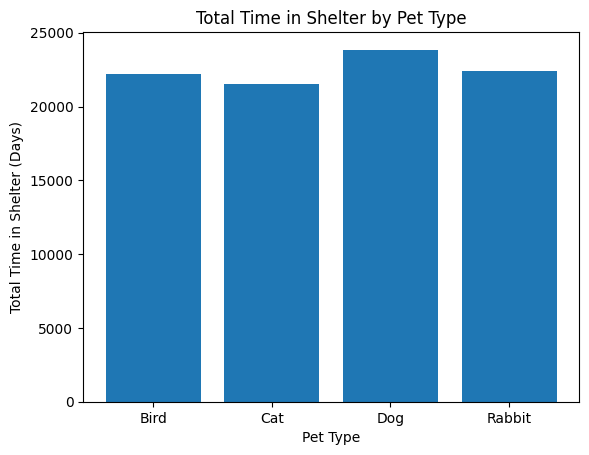

In [70]:
y = df.groupby('PetType')['TimeInShelterDays'].sum()

# Create a bar plot
plt.bar(y.index, y)
plt.xlabel('Pet Type')
plt.ylabel('Total Time in Shelter (Days)')
plt.title('Total Time in Shelter by Pet Type')
plt.show()

In [71]:
df=pd.read_csv('pet_adoption_data.csv')
num_dogs = df[df['PetType'] == 'Dog'].shape[0]
print(f"Total number of dogs: {num_dogs}")



Total number of dogs: 525


In [72]:
df.query('HealthCondition==1').shape

(401, 13)

In [73]:
df['Breed'].unique()

array(['Parakeet', 'Labrador', 'Golden Retriever', 'Poodle', 'Persian',
       'Siamese'], dtype=object)

In [74]:
X=df.drop(columns=['PetID','AgeMonths','Breed','PetType','Color','Size','WeightKg','AdoptionFee','PreviousOwner','AdoptionLikelihood'])
X

,Vaccinated,HealthCondition,TimeInShelterDays
0,1,0,43
1,0,0,50
2,0,0,3
3,0,0,59
4,1,0,28
...,...,...,...
2002,1,0,78
2003,1,0,78
2004,0,0,17
2005,0,0,72


In [75]:
y=df['PetType']
y

0         Bird
1       Rabbit
2          Dog
3         Bird
4         Bird
         ...  
2002       Cat
2003    Rabbit
2004    Rabbit
2005      Bird
2006    Rabbit
Name: PetType, Length: 2007, dtype: object

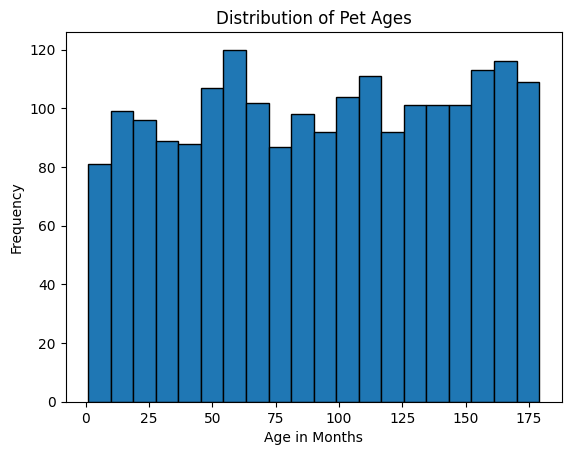

In [77]:
#Histogram for the ‘AgeMonths’ column
import matplotlib.pyplot as plt

plt.hist(df['AgeMonths'], bins=20, edgecolor='black')
plt.xlabel('Age in Months')
plt.ylabel('Frequency')
plt.title('Distribution of Pet Ages')
plt.show()

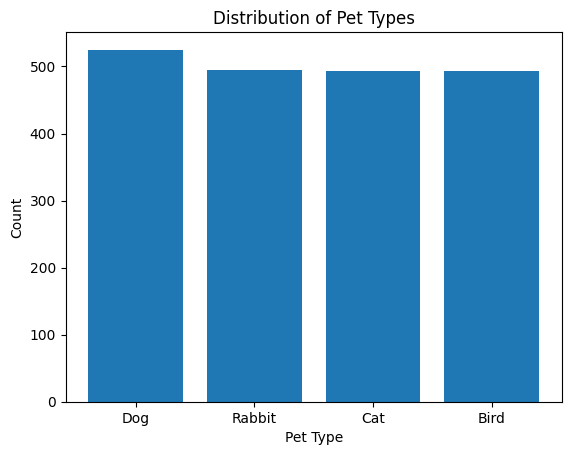

In [78]:
#Bar chart for the ‘PetType’ column
pet_type_counts = df['PetType'].value_counts()
plt.bar(pet_type_counts.index, pet_type_counts.values)
plt.xlabel('Pet Type')
plt.ylabel('Count')
plt.title('Distribution of Pet Types')
plt.show()


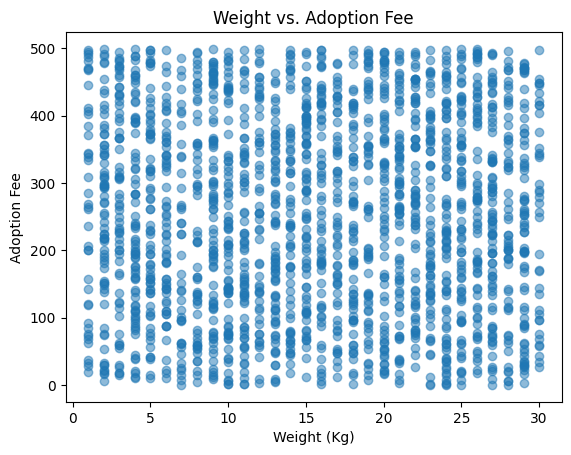

In [79]:
#Scatter plot for ‘WeightKg’ vs. ‘AdoptionFee’
plt.scatter(df['WeightKg'], df['AdoptionFee'], alpha=0.5)
plt.xlabel('Weight (Kg)')
plt.ylabel('Adoption Fee')
plt.title('Weight vs. Adoption Fee')
plt.show()


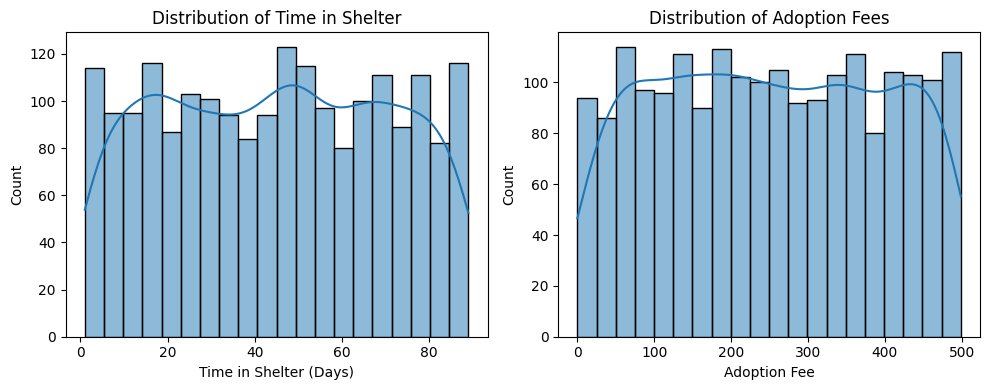

In [80]:
 #Distribution of numerical features for ‘TimeInShelterDays’ and ‘AdoptionFee’
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['TimeInShelterDays'], bins=20, kde=True)
plt.xlabel('Time in Shelter (Days)')
plt.title('Distribution of Time in Shelter')

plt.subplot(1, 2, 2)
sns.histplot(df['AdoptionFee'], bins=20, kde=True)
plt.xlabel('Adoption Fee')
plt.title('Distribution of Adoption Fees')

plt.tight_layout()
plt.show()


In [93]:
#Building a model
X = df[['Vaccinated',  'HealthCondition', 'TimeInShelterDays']]
y = df['AdoptionLikelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       399
           1       0.47      0.37      0.41       204

    accuracy                           0.65       603
   macro avg       0.59      0.58      0.58       603
weighted avg       0.63      0.65      0.63       603



In [95]:

import joblib

joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']